## Student #1 ID:209193002

## Student #2 ID:207781956

# Exercise 1: Linear Regression

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Those tests will not be graded nor checked.
1. You are free to add code and markdown cells as you see fit.
1. Write your functions in this jupyter notebook only. Do not create external python modules and import from them.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only, unless otherwise mentioned.
1. Your code must run without errors. During the environment setup, you were given a specific version of Python of install (`Python >= 3.6, numpy >= 1.14`). 
1. Answers to qualitative questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. No not use ZIP or RAR. For example, your submission should look like this: `123456789.ipynb` if you worked by yourself or `123456789_987654321.ipynb` if you worked in pairs.

## In this exercise you will perform the following:
1. Load a dataset and perform basic data exploration using a powerful data science library called [pandas](https://pandas.pydata.org/pandas-docs/stable/).
1. Pre-process the data for linear regression.
1. Compute the cost and perform gradient descent in pure numpy in vectorized form.
1. Perform multivariate linear regression.
1. Visualize your results using matplotlib.
1. Preform feature selection.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# make matplotlib figures appear inline in the notebook
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Part 1: Data Preprocessing (5 Points)

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 21,613 observations with 17 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# Read comma separated data
df = pd.read_csv('kc_house_data.csv') # Relative paths are sometimes better than absolute paths.
# df stands for dataframe, which is the default format for datasets in pandas
df.shape 

(21613, 20)

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Fortunately, pandas is built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [5]:
# Print the first 10 entries of the dataframe. 

# Your code starts here
df.head(10)
# Your code ends here

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
# Show the statistics of the dataset. 

# Your code starts here
df.describe()
# Your code ends here

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Since we are dealing with simple linear regression, we will extract the target values and the `sqft_living` variable from the dataset. Use pandas and select both columns as separate variables and transform them into a numpy array.**

In [7]:
###### dani I'm not sure what they want here ###### 
# I did not understand either : ((((
sqft_living = df['sqft_living'].to_numpy()
price = df['price'].to_numpy()

## Preprocessing

Before performing linear regression, we notice that some of the features are clearly irrelevant. Remove the features 
`id` and `date`. from the dataframe and save the values of the relevant feature in a dedicated variable as a numpy array. Save the targets as a different variable, also as a numpy array.

We need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant. The features your should ignore are the `id` and `date`.

In [8]:
X = None # placeholder for the variables
y = None # placeholder for the target values

# Your code starts here
relevant_features = df.drop(columns=['price', 'id', 'date'])
X = relevant_features.to_numpy()
y = price
X.shape, y.shape
# Your code ends here

((21613, 17), (21613,))

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes.

Implement the cost function `preprocess` and make sure you are using vectorized operations (5 points).

In [9]:
def preprocess(X, y):
    """
    Perform min-max scaling for both the data and the targets.
    Input:
    - X: Inputs (n features, m instances).
    - y: True labels (1 target, m instances).

    Output:
    - X: The scaled inputs.
    - y: The scaled labels.
    """
    ###########################################################################
    # TODO: Implement Min-Max Scaling.                                        #
    ###########################################################################
    # Your code starts here
    X_min = X.min(axis=0)
    Y_min = y.min()
    X_max = X.max(axis=0)
    Y_max = y.max()
    # in cases where min equals max, avoid division by zero by setting the donominator to 1 (the scaled value will be 0)
    X_max[X_max == X_min] = X_min[X_max == X_min] + 1
    if Y_max == Y_min:
        Y_max = Y_min + 1    
    X = (X - X_min) / (X_max - X_min)
    y = (y - Y_min) / (Y_max - Y_min)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return X, y

In [10]:
X, y = preprocess(X, y)
X[:5]

array([[0.09090909, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.47826087, 0.        , 0.89393939, 0.57149751, 0.21760797,
        0.16193426, 0.00574235],
       [0.09090909, 0.28125   , 0.17207547, 0.00407187, 0.4       ,
        0.        , 0.        , 0.5       , 0.5       , 0.20614035,
        0.44347826, 0.98808933, 0.62626263, 0.90895931, 0.16611296,
        0.22216486, 0.00802712],
       [0.06060606, 0.125     , 0.03622642, 0.00574253, 0.        ,
        0.        , 0.        , 0.5       , 0.41666667, 0.05263158,
        0.28695652, 0.        , 0.13636364, 0.93614283, 0.23754153,
        0.3994149 , 0.00851302],
       [0.12121212, 0.375     , 0.12603774, 0.00271377, 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.08333333,
        0.56521739, 0.        , 0.68181818, 0.58693904, 0.10465116,
        0.16537601, 0.0049957 ],
       [0.09090909, 0.25      , 0.10490566, 0.004579

## Data Visualization

Many real-world datasets, such as the dataset we are dealing with, are highly dimensional and cannot be visualized naively. <br>
However, we can choose a feature and visualize the target price as a function of that feature. Pay close attention to the range of the axis, and include axis labels and a title for the figure. 

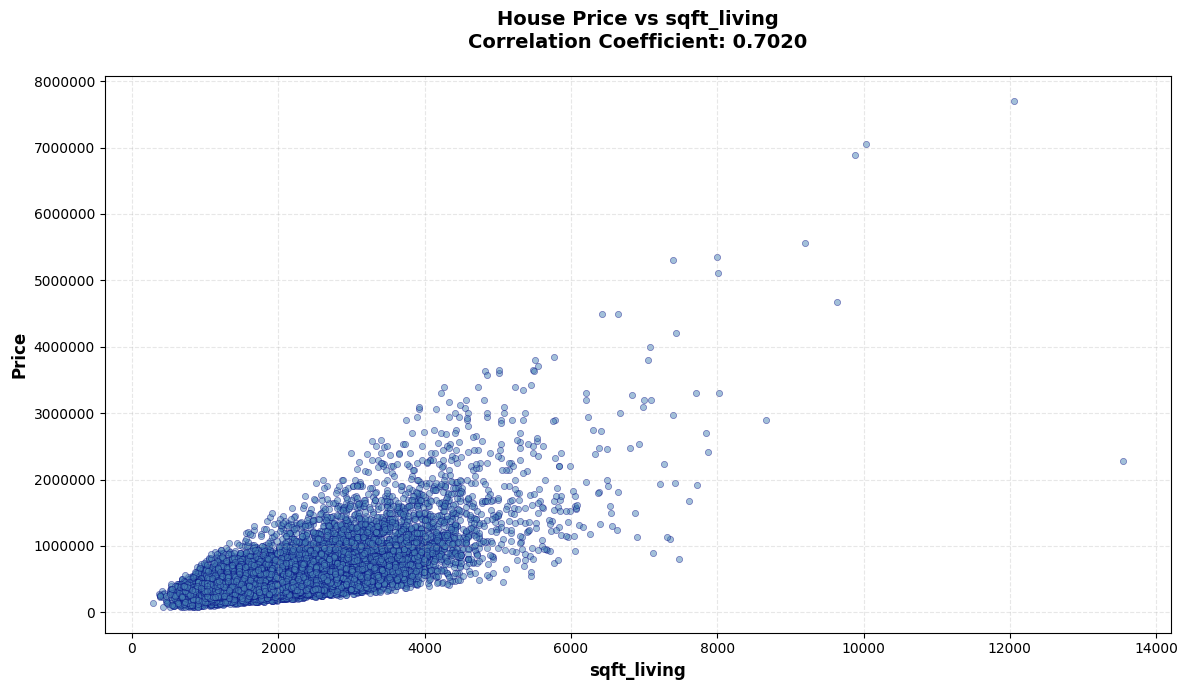

In [36]:
# Choose one fearture an plot the target price as a function of that feature
# Your code starts here
relevant_with_target = df.drop(columns=['id', 'date'])
corr_matrix = relevant_with_target.corr()
target_corr = corr_matrix['price'].drop('price').abs()
# Find the feature with highest correlation
max_corr_feature = target_corr.idxmax()
corr = target_corr[max_corr_feature]

# Create figure with better styling
plt.figure(figsize=(12, 7))
plt.scatter(df[max_corr_feature], df['price'], alpha=0.5, s=20, c='steelblue', edgecolors='navy', linewidth=0.5)
plt.xlabel(max_corr_feature, fontsize=12, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.title(f'House Price vs {max_corr_feature}\nCorrelation Coefficient: {corr:.4f}', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
# Your code ends here

## Bias Trick

Make sure that the data variable `X` supports the bias term $\theta_0$. 

$$
\hat{y} = h_\theta(\vec{x}) = \vec{\theta^T} \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$

Add columns of ones as the zeroth column of `X`.

In [12]:
# Your code starts here
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
# Your code ends here
X_with_bias[:5]
X = X_with_bias

# Part 2: Multi Variable Linear Regression (65 Points)

In this part we will create a multivariate linear model and the logic needed to trained it using the given data.

Our task is to find a linear model that best explains our dataset. We start by guessing initial values for the linear regression parameters $\vec{\theta}$ and updating the values using gradient descent. The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

Implement the cost function `compute_cost`. (10 points)

In [13]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.

    Output:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    ###########################################################################
    # TODO: Implement the MSE cost function.                                  #
    ###########################################################################
    m = X.shape[0]  # number of instances
    predictions = X @ theta  # @ is the matrix multiplication operator
    squared_errors = (predictions - y) ** 2  # squared differences
    J = (1 / (2 * m)) * np.sum(squared_errors)  # MSE formula
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return J

In [14]:
np.random.seed(42) # seeding the random number generator allows us to obtain reproducible results
theta = np.array(np.random.random(size=X.shape[1]))
compute_cost(X, y, theta)

np.float64(3.214368144486156)

Implement the function `gradient_descent`. (10 points)

In [15]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent. Gradient descent
    is an optimization algorithm used to minimize a (loss) function by 
    iteratively moving in the direction of steepest descent as defined by the
    opposite direction of the gradient. Instead of performing a constant number
    of iterations, stop the training process once the loss improvement from
    one iteration to the next is smaller than `1e-8`.
    
    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of the model.
    - num_iters: The number of iterations performed.

    Output:
    - theta: The learned parameters of the model.
    - J_history: the loss value in each iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    m = X.shape[0]  # number of instances
    XT = X.T # precompute X transpose for efficiency

    for i in range(num_iters):
        # Compute predictions
        predictions = X.dot(theta)
        
        # Compute errors
        errors = predictions - y
        
        # Compute gradient (vectorized)
        gradient = (1 / m) * (XT.dot(errors))
        
        # Update theta
        theta = theta - alpha * gradient
        
        # Compute and save cost
        J = compute_cost(X, y, theta)
        J_history.append(J)
        
        # Early stopping: check if improvement is less than 1e-8
        if i > 0 and abs(J_history[i-1] - J_history[i]) < 1e-8:
            break

        if np.isnan(J) or np.isinf(J):
            print("Gradient descent diverged. Try reducing alpha.")
            break
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

In [16]:
np.random.seed(42)
theta = np.random.random(size=X.shape[1])
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X ,y, theta, alpha, iterations)
print(theta)
print(min(J_history))

[-0.12118707  0.40092423 -0.01923327  0.22519398 -0.02908722  0.01622405
  0.08505086  0.02846862  0.0095747   0.19528853 -0.06232667 -0.0336839
  0.00721711 -0.01271776  0.05075512 -0.03401369  0.01913922  0.18634727]
0.000441026763406828


You can evaluate the learning process by monitoring the loss as training progress. Visualize the loss as a function of the iterations using the `J_history` array. This might help you find problems with your code and might indicate that your model fails to converge. Your visualization should be clear and include a title, labels and a proper scale.

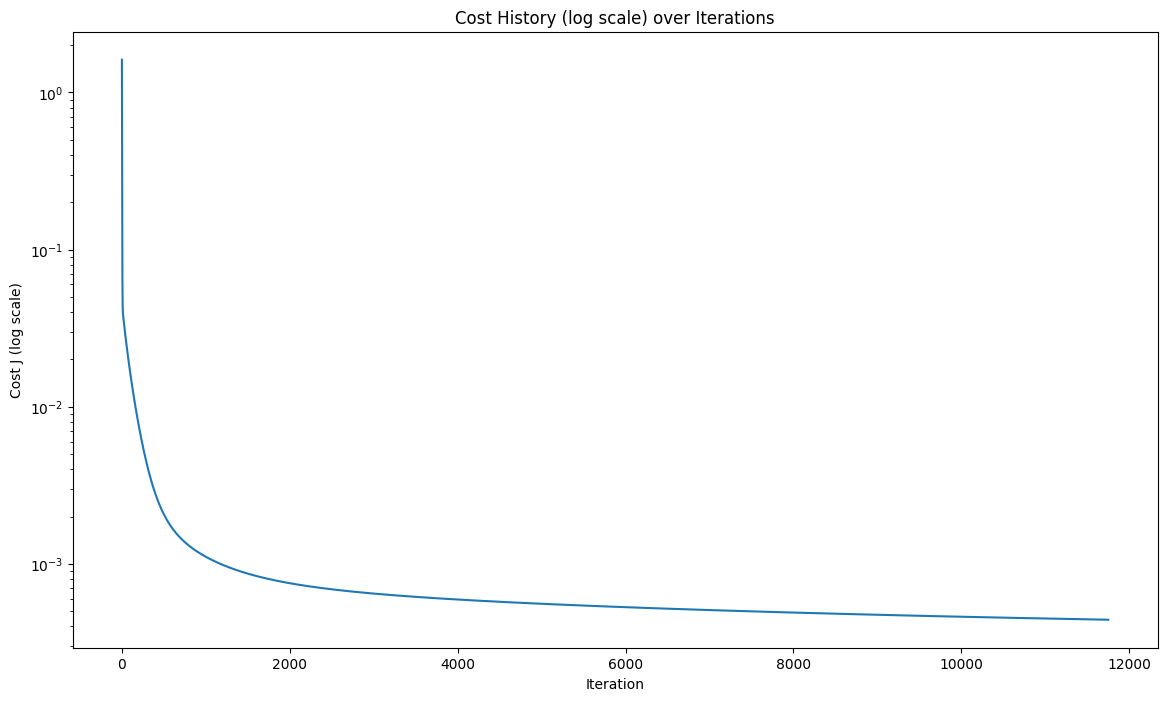

In [17]:
# Your code starts here
def plot_cost_history(J_history):
    plt.plot(J_history)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Cost J (log scale)')
    plt.title('Cost History (log scale) over Iterations')
    plt.show()

plot_cost_history(J_history)
# Your code ends here

Linear regression can also be solved by using the pseudo-inverse method. Implement the following function **without using `np.pinv`**. Instead, use direct matrix multiplication as you saw in class. (10 points)

In [18]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Outpu:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE numpy.pinv ##############
    """
    pinv_theta = [] # Use a python list to save cost in every iteration
    ###########################################################################
    # TODO: Implement the pseudoinverse algorithm.                            #
    ###########################################################################
    # Normal equation: theta = (X^T X)^-1 X^T y
    pinv_theta = np.linalg.inv(X.T @ X) @ X.T @ y
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pinv_theta

In [19]:
theta_pinv = pinv(X,y)
J_pinv = compute_cost(X, y, theta_pinv)
J_pinv

np.float64(0.0003484484564302159)

Use the results of the previous section to assess the convergence of the gradient descent process. Explain and use clear visualziations.

Your answer here:

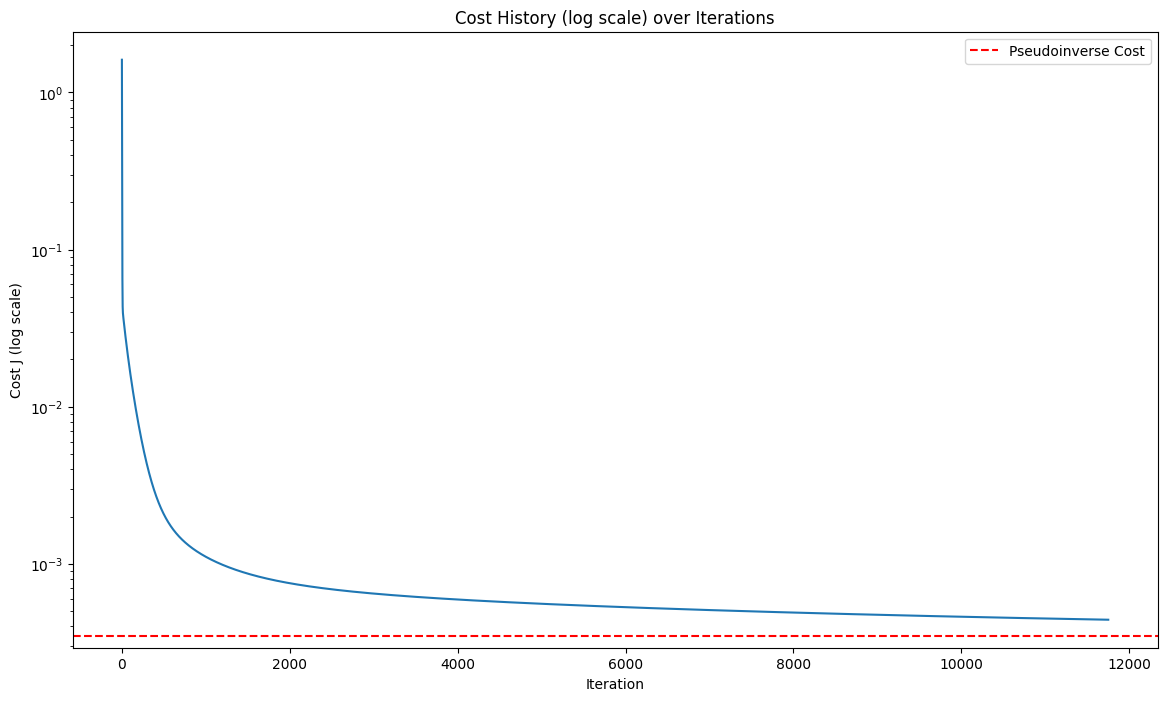

In [20]:
# Your code starts here
def plot_cost_history_w_pinv(J_history,J_pinv):
    plt.plot(J_history)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Cost J (log scale)')
    plt.title('Cost History (log scale) over Iterations')
    plt.axhline(y=J_pinv, color='r', linestyle='--', label='Pseudoinverse Cost')
    plt.legend()
    plt.show()

plot_cost_history_w_pinv(J_history, J_pinv)

# Your code ends here
# it looks like the pseudoinverse cost is lower than the gradient descent cost after convergence.

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. 

In [21]:
def find_best_alpha(X, y, iterations):
    """
    Iterate over the provided values of alpha and maintain a python 
    dictionary with alpha as the key and the final loss as the value.
    For consistent results, use the same theta value for all runs.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels (1 value over m instances).
    - num_iters: The number of iterations performed.

    Output:
    - alpha_dict: A python dictionary containing alpha as the 
                  key and the final loss as the value
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    for alpha in alphas:
        np.random.seed(42)
        theta = np.random.random(size=X.shape[1]) # reset theta for each alpha
        final_theta, J_history = gradient_descent(X ,y, theta, alpha, iterations)
        final_cost = J_history[-1]
        alpha_dict[alpha] = final_cost
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return alpha_dict

In [22]:
alpha_dict = find_best_alpha(X, y, 40000)
alpha_dict

Gradient descent diverged. Try reducing alpha.
Gradient descent diverged. Try reducing alpha.
Gradient descent diverged. Try reducing alpha.


c:\Users\evya1\anaconda3\envs\evya_venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


{1e-05: np.float64(0.3395531999574745),
 3e-05: np.float64(0.04222877486065836),
 0.0001: np.float64(0.029080358297774424),
 0.0003: np.float64(0.013902449034735895),
 0.001: np.float64(0.0027933586082553425),
 0.003: np.float64(0.0009864325092034426),
 0.01: np.float64(0.0006876315651126106),
 0.03: np.float64(0.000566279250148103),
 0.1: np.float64(0.000441026763406828),
 0.3: np.float64(0.00038319663799149696),
 1: np.float64(inf),
 2: np.float64(inf),
 3: np.float64(inf)}

Obtain the best learning rate from the dictionary `alpha_dict`. This can be done in a single line using built-in functions. 

**Explain the differences between the performance characteristics you observe.**

Your answer here:

In [23]:
best_alpha = None
# Your code starts here
best_alpha = min(alpha_dict, key=alpha_dict.get)
best_alpha
# Your code ends here

0.3

Explanation: As the learning rate increases, gradient descent initially becomes more efficient: each update makes larger steps in the direction that reduces the cost, so the cost decreases faster. However, once the learning rate becomes too large, the updates overshoot the minimum instead of moving toward it. This causes the algorithm to jump back and forth across the minimum, eventually diverging instead of converging.

In this case, we see that for small learning rates the cost steadily decreases, but once the learning rate reaches values like 1, 2, or 3, the updates become unstable and the cost explodes to infinity. This indicates that the algorithm failed to converge at those learning rates.

Pick the best three alpha values you just calculated and provide **one** graph with three lines indicating the loss as a function of iterations. Note you are required to provide general code for this purpose (no hard-coding). Make sure the visualization is clear and informative. (5 points)

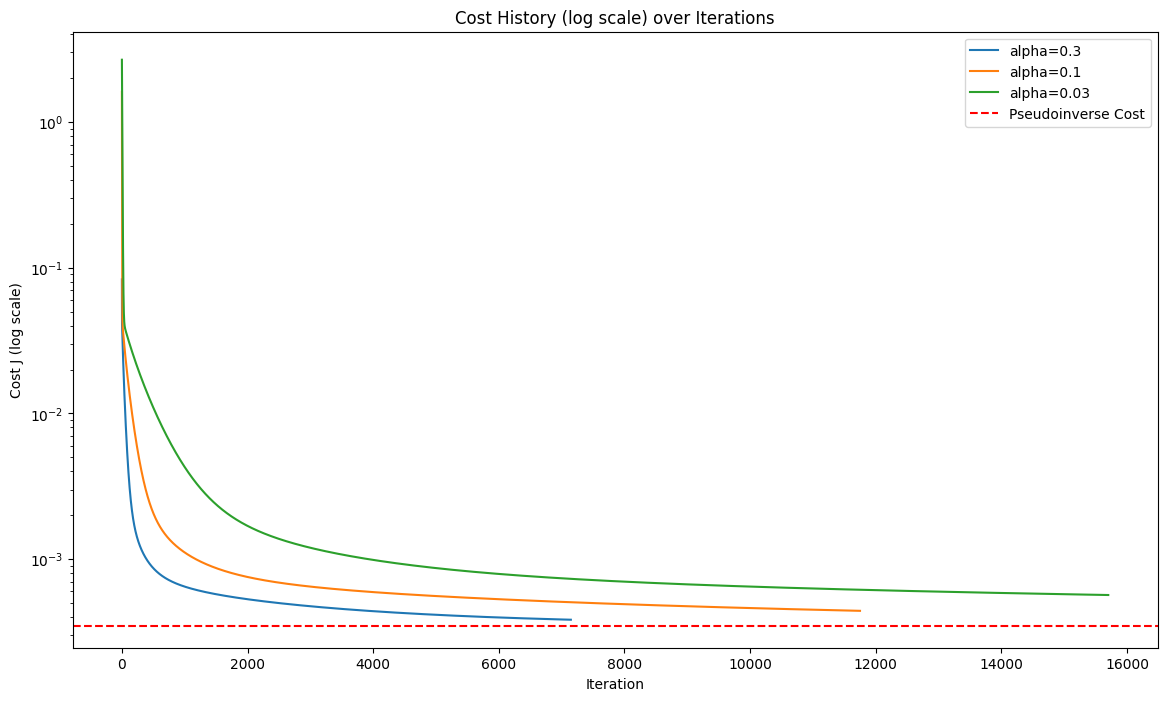

In [24]:
# Your code starts here
sorted_alpha_dict = {k: v for k, v in alpha_dict.items() if not (np.isnan(v) or np.isinf(v))} # remove nans and infs
sorted_alpha_dict = dict(sorted(sorted_alpha_dict.items(), key=lambda item: item[1])) # sort by final cost (minimum first)
best_three_alphas = list(sorted_alpha_dict.keys())[:3] # take the best three alphas

#make the plot
plt.xlabel('Iteration')
plt.ylabel('Cost J (log scale)')
plt.yscale('log')
plt.title('Cost History (log scale) over Iterations')
np.random.seed(42)
theta = np.random.random(size=X.shape[1]) # using the same initial theta for all alphas
iterations = 40000
for alpha in best_three_alphas:
    final_theta, J_history = gradient_descent(X ,y, theta, alpha, iterations)
    plt.plot(J_history, label=f'alpha={alpha}')
plt.axhline(y=J_pinv, color='r', linestyle='--', label='Pseudoinverse Cost') # add pseudoinverse cost line to see how it compares
plt.legend()
plt.show()
# Your code ends here

Time for yet another visual sanity check. Create two scatter plots on the same figure: on one side, plot the predictions you obtained from a model trained using the alpha you previously found vs the predictions calculated using the optimal theta calculated using the pseudo-inverse. On the other size, create a scatter plot showing your model predictions vs the target values.

What do you expect to see? Explain the results.
 
Your answer here:

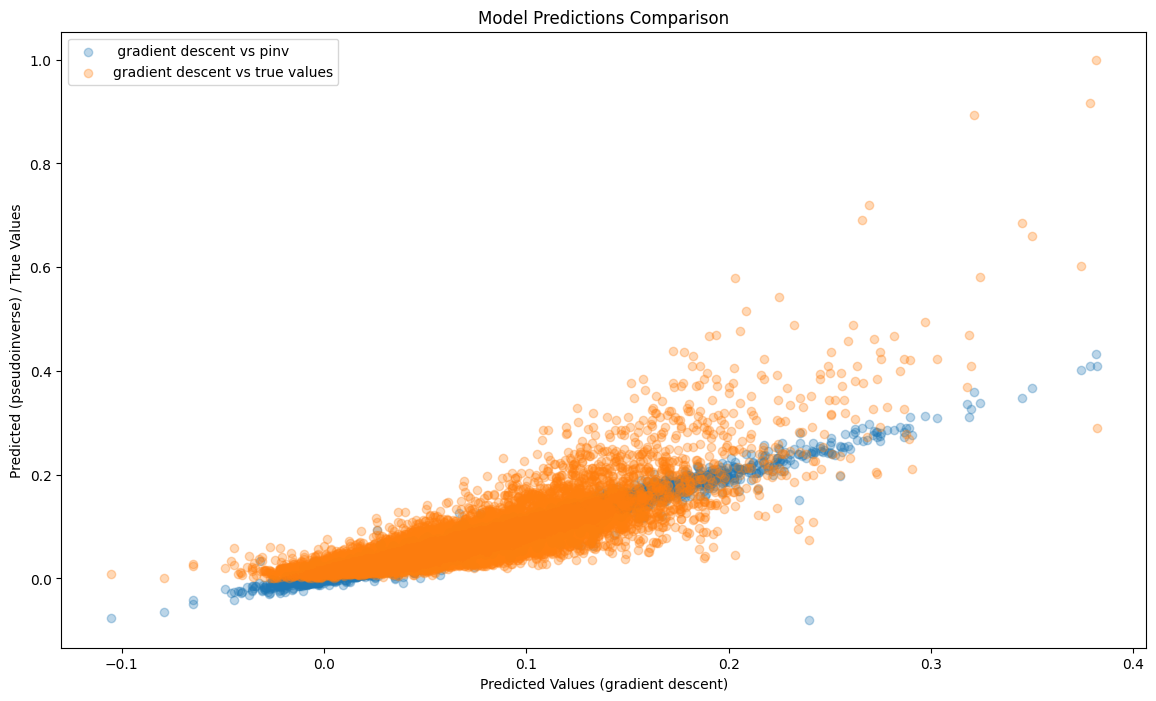

In [25]:
# Your code starts here
pinv_predictions = X @ theta_pinv
np.random.seed(42)
theta = np.random.random(size=X.shape[1])
theta, J_history = gradient_descent(X ,y, theta, best_alpha, 40000)
alpha_predictions = X @ theta
plt.scatter(alpha_predictions, pinv_predictions , label=' gradient descent vs pinv', alpha=0.3) #alpha means 30% opacity, not realted to learning rate
# I'm not sure if in "model predictions" they meant to the pinv or the gradient descent with best alpha
# Dani I think they meant the gradient decent like you did, I change the axis labels a little and the order of the scatter plots. the X is the gradient descent predictions and the Y is the pinv and the true values.
plt.scatter(alpha_predictions, y, label='gradient descent vs true values', alpha=0.3) 
plt.legend()
plt.title('Model Predictions Comparison')
plt.xlabel('Predicted Values (gradient descent)')
plt.ylabel('Predicted (pseudoinverse) / True Values')
plt.show()
# Your code ends here

## Part 3: feature selection (30 points)

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance. Find the combination of three features that best minimizes the loss on the validation set. First, we will reload the dataset as a dataframe in order to access the feature names. Use the dataframe with the relevant features as the input to the `generate_triplets` and obtain a list of all possible feature triplets.

In [26]:
import itertools
def generate_triplets(X):
    """
    generate all possible sets of three features out of all relevant features
    available from the given dataset X. Hint: check out the python package
    'itertools'.di

    Input:
    - X: Inputs (n features over m instances, including bias at column 0).

    Output:
    - A python list containing all feature triplets as integers (excluding bias).
    """
    
    triplets = []
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # Generate triplets from actual features only (exclude bias column at index 0)
    n_features = X.shape[1] - 1  # subtract 1 for bias column
    itertools_triplets = itertools.combinations(range(n_features), 3)
    triplets = [triplet for triplet in itertools_triplets]
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return triplets


In [27]:
triplets = generate_triplets(X)
print(triplets[:5])  # show the first 5 triplets
print(len(triplets))

[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6)]
680


In order to choose the best triplet possible, we will train a model using the training dataset (70%) and evaluate its performance on the validation dataset (20%). It is crucial to randomly split the dataset to obtain significant results. We will use the remaining 10% for the testing dataset (final model evaluation).

In [28]:
train_idx = None
val_idx  = None
test_idx = None
# Your code starts here
data_size = X.shape[0]
train_size = int(0.7 * data_size) #approximately 70% for training
val_size = int(0.2 * data_size) #approximately 20% for validation
test_size = data_size - train_size - val_size #the rest for testing (approximately 10%)

np.random.seed(42)
indices = np.random.permutation(data_size) # suffle the indices
train_idx = indices[:train_size]
val_idx = indices[train_size:train_size + val_size]
test_idx = indices[train_size + val_size:]

# Your code ends here

In [29]:
X_train = X[train_idx]
X_val  = X[val_idx]
X_test = X[test_idx]

y_train = y[train_idx]
y_val  = y[val_idx]
y_test = y[test_idx]

Complete the function `find_best_triplet`. Note, this might take a while since there are hundreds of possible feature combinations. This is a good chance to check your gradient descent implementation and make sure it is efficient. 

In [30]:
def find_best_triplet(X_train, y_train, X_val, y_val, triplets, alpha, num_iter):
    """
    Iterate over all possible triplets and find the triplet that best 
    minimizes the cost function. Expects preprocessed data with bias term.

    Input:
    - X_train: training dataset (preprocessed with bias column at index 0).
    - y_train: training labels (preprocessed).
    - X_val: validation dataset (preprocessed with bias column at index 0).
    - y_val: validation labels (preprocessed).
    - triplets: a list of three features in X.
    - alpha: The value of the best alpha previously found.
    - num_iters: The number of updates performed.

    Output:
    - The best triplet.
    """
    best_triplet = None
    best_val_cost = float('inf') # initialize to infinity
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # initialize theta (same for all triplets for consistency)
    np.random.seed(42)
    theta = np.random.random(size=4) # 3 features + bias term = 4
    
    for triplet in triplets:
        # extract the triplet features + bias term
        # triplets contains feature indices 0-(n-1), need to add 1 to skip bias column
        X_train_triplet = X_train[:, [0] + [i + 1 for i in triplet]]
        X_val_triplet = X_val[:, [0] + [i + 1 for i in triplet]]
        # train the model
        final_theta, J_history = gradient_descent(X_train_triplet, y_train, theta, alpha, num_iter)
        # compute validation cost
        val_cost = compute_cost(X_val_triplet, y_val, final_theta)
        # update best triplet if needed
        if best_triplet is None or val_cost < best_val_cost:
            best_triplet = triplet
            best_val_cost = val_cost
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return best_triplet

In [31]:
X_train[:5]

array([[1.        , 0.12121212, 0.28125   , 0.13433962, 0.00507197,
        0.4       , 0.        , 0.        , 0.75      , 0.58333333,
        0.19517544, 0.74782609, 0.        , 0.28787879, 0.45504263,
        0.29651163, 0.34262605, 0.00809719],
       [1.        , 0.15151515, 0.375     , 0.19698113, 0.00376172,
        0.        , 0.        , 0.        , 1.        , 0.58333333,
        0.16885965, 0.66956522, 0.        , 0.57575758, 0.84043751,
        0.19435216, 0.33918431, 0.00646948],
       [1.        , 0.12121212, 0.3125    , 0.26264151, 0.00628347,
        0.4       , 0.        , 0.5       , 0.5       , 0.83333333,
        0.38157895, 0.84347826, 0.        , 0.02525253, 0.65739102,
        0.32392027, 0.56978145, 0.01037736],
       [1.        , 0.09090909, 0.4375    , 0.32226415, 0.00853384,
        0.4       , 0.        , 0.5       , 0.5       , 0.91666667,
        0.46820175, 0.7826087 , 0.        , 0.16666667, 0.87437671,
        0.24169435, 0.62829117, 0.01559361],
    

In [32]:
best_triplet = find_best_triplet(X_train, y_train, X_val, y_val, triplets, alpha=best_alpha, num_iter=20000)
print(best_triplet)

(2, 6, 13)


### Forward Feature Selection

As you have seen in class, train the model using one feature at a time, and choose the best single feature (use the validation dataset and save the feature for which you obtain the best loss value). Next, check which feature performs best when added to the feature you previously chose. Repeat this process until you reach 3 features + bias.

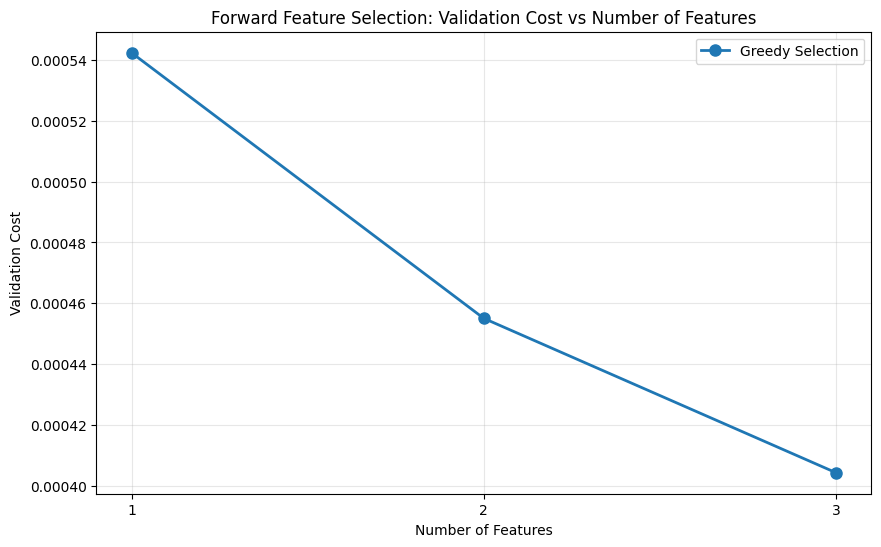

Selected Features: [2, 13, 6]


In [43]:
def forward_feature_selection(X_train, y_train, X_val, y_val, alpha, num_iter, max_features=3):
    """
    Perform forward feature selection using a greedy algorithm.
    Iteratively add features that minimize validation cost.
    
    Input:
    - X_train: training dataset (with bias column at index 0).
    - y_train: training labels.
    - X_val: validation dataset (with bias column at index 0).
    - y_val: validation labels.
    - alpha: Learning rate.
    - num_iter: Number of gradient descent iterations.
    - max_features: Maximum number of features to select (default 3, stopping condition).
    
    Output:
    - selected_features: List of selected feature indices (excluding bias).
    - validation_costs: List of validation costs at each step.
    """
    
    # Number of features (excluding bias column at index 0)
    n_features = X_train.shape[1] - 1
    
    # Track selected features (indices without bias)
    selected_features = []
    
    # Track remaining features to consider
    remaining_features = list(range(n_features))
    
    # Track validation costs at each step
    validation_costs = []
    
    # Iteratively select features until we reach max_features (stopping condition)
    for step in range(max_features):
        best_feature = None
        best_val_cost = float('inf')
        best_theta = None
        
        # Try adding each remaining feature
        for feature_idx in remaining_features:
            # Create feature set: bias + selected features + candidate feature
            # Convert to 1-indexed for X columns (since bias is at 0)
            current_feature_indices = [0] + [f + 1 for f in selected_features] + [feature_idx + 1]
            
            # Extract columns
            X_train_subset = X_train[:, current_feature_indices]
            X_val_subset = X_val[:, current_feature_indices]
            
            # Initialize theta (bias + selected features + 1 new feature)
            np.random.seed(42)
            theta = np.random.random(size=len(current_feature_indices))
            
            # Train model
            final_theta, J_history = gradient_descent(X_train_subset, y_train, theta, alpha, num_iter)
            
            # Compute validation cost
            val_cost = compute_cost(X_val_subset, y_val, final_theta)
            
            # Update best feature
            if val_cost < best_val_cost:
                best_val_cost = val_cost
                best_feature = feature_idx
                best_theta = final_theta
        
        # Add best feature to selected set
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        validation_costs.append(best_val_cost)
    
    return selected_features, validation_costs


# Run forward feature selection (greedy approach)
selected_features, validation_costs = forward_feature_selection(
    X_train, y_train, X_val, y_val, 
    alpha=best_alpha, 
    num_iter=20000, 
    max_features=3  # Stopping condition: exactly 3 features
)

# Visualize the improvement
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(validation_costs) + 1), validation_costs, marker='o', linewidth=2, markersize=8, label='Greedy Selection')
plt.xlabel('Number of Features')
plt.ylabel('Validation Cost')
plt.title('Forward Feature Selection: Validation Cost vs Number of Features')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(validation_costs) + 1))
plt.legend()
plt.show()

print("Selected Features:", selected_features)


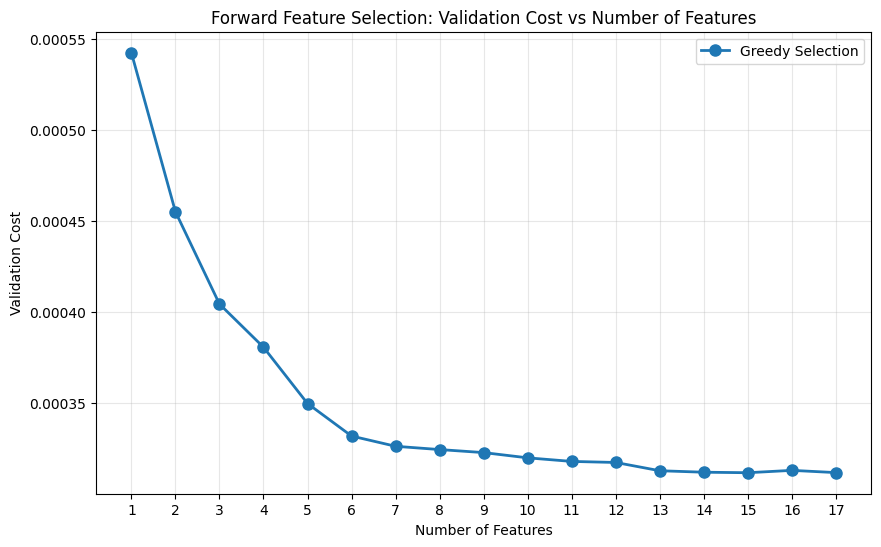

In [35]:
selected_features, validation_costs = forward_feature_selection(
    X_train, y_train, X_val, y_val, 
    alpha=best_alpha, 
    num_iter=20000, 
    max_features= 17  # Stopping condition: exactly 3 features
)

# Visualize the improvement
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(validation_costs) + 1), validation_costs, marker='o', linewidth=2, markersize=8, label='Greedy Selection')
plt.xlabel('Number of Features')
plt.ylabel('Validation Cost')
plt.title('Forward Feature Selection: Validation Cost vs Number of Features')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(validation_costs) + 1))
plt.legend()
plt.show()

### Explanation for the forward selection part: 

It’s interesting to see that both the exact solution and the greedy (heuristic) forward-selection method ended up choosing the same set of features. The main advantage of the greedy approach is speed—across most of our runs, it was roughly 100× faster than computing the exact optimal solution.

Next, we examined how the validation cost changes as we add features during the greedy forward-selection process. The plot shows that after selecting around six features, the rate of improvement slows down noticeably (an “elbow” point). Beyond this point, adding more features yields diminishing returns and may even lead to overfitting, as the model becomes unnecessarily complex without meaningful gains in validation performance.

Use the testing dataset and report your findings. Explain the results.

Selected Features (indices): [2, 13, 6]
Test Set Cost: 0.000401


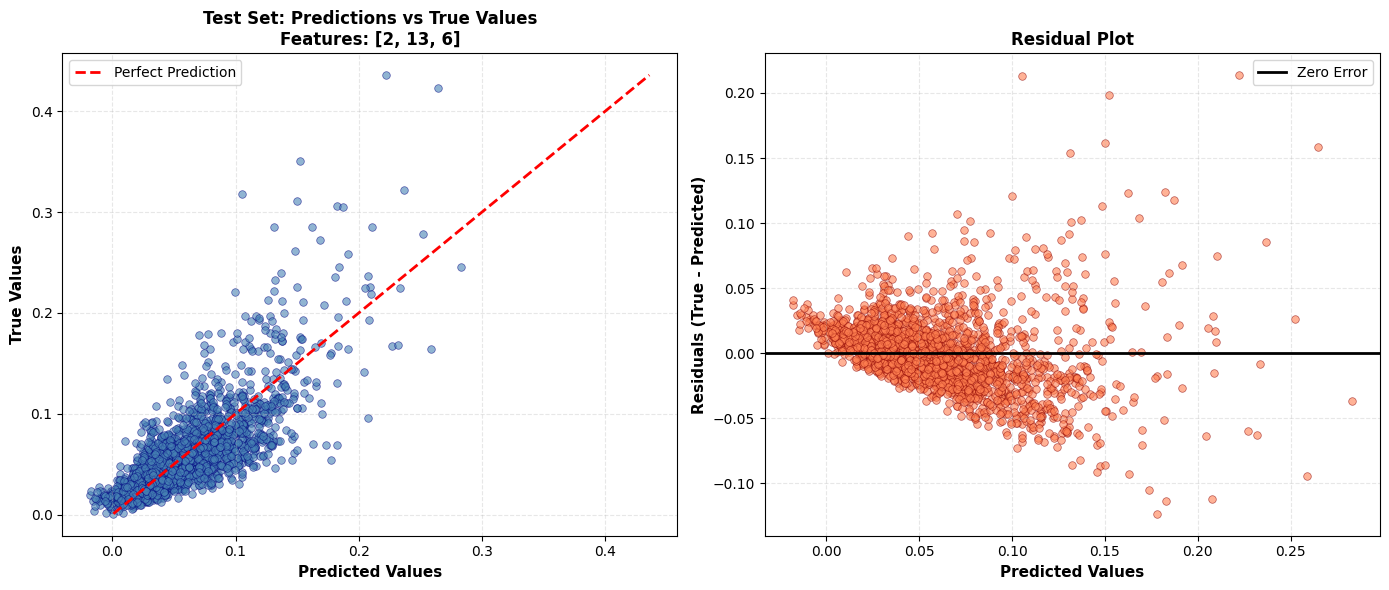

In [45]:
# ============================================================================
# TEST SET EVALUATION: Best 3 Features
# ============================================================================

# Since greedy and exact found the same features, we only need to evaluate once
best_features = selected_features  # or best_triplet - they're the same

# Extract the feature columns (bias + 3 selected features)
X_train_best = X_train[:, [0] + [f + 1 for f in best_features]]
X_test_best = X_test[:, [0] + [f + 1 for f in best_features]]

# Train the model on the best features
np.random.seed(42)
theta_best = np.random.random(size=4)
theta_best, J_history = gradient_descent(X_train_best, y_train, theta_best, best_alpha, 20000)

# Evaluate on test set
test_cost = compute_cost(X_test_best, y_test, theta_best)

print(f"Selected Features (indices): {best_features}")
print(f"Test Set Cost: {test_cost:.6f}")


# Visualization: Predictions vs True Values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot: Predicted vs True
predictions = X_test_best @ theta_best
axes[0].scatter(predictions, y_test, alpha=0.6, s=30, c='steelblue', edgecolors='navy', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
axes[0].set_ylabel('True Values', fontsize=11, fontweight='bold')
axes[0].set_title(f'Test Set: Predictions vs True Values\nFeatures: {best_features}', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, linestyle='--')

# Residual plot
residuals = y_test - predictions
axes[1].scatter(predictions, residuals, alpha=0.6, s=30, c='coral', edgecolors='darkred', linewidth=0.5)
axes[1].axhline(y=0, color='black', linestyle='-', lw=2, label='Zero Error')
axes[1].set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Residuals (True - Predicted)', fontsize=11, fontweight='bold')
axes[1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Calculate additional metrics
mse = test_cost * 2  # convert back from cost function (which divides by 2m)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuals))
